# Analysis of the bias-variance tradeoff

### Importing libraries

In [8]:
from sample_data import create_data_samples, DataSamplesType
from linear_model import LinearModel, LinearModelType
from design_matrix import create_design_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

import matplotlib.pyplot as plt
import numpy as np
import warnings


## Ignoring spesific warnings

In [9]:
warnings.simplefilter(action='ignore', category=FutureWarning)

### Loading dataset

In [10]:
x, y, z = create_data_samples(DataSamplesType.TEST)

### Linear regression

at polynomial 1 out of 12
at polynomial 2 out of 12
at polynomial 3 out of 12
at polynomial 4 out of 12
at polynomial 5 out of 12
at polynomial 6 out of 12
at polynomial 7 out of 12
at polynomial 8 out of 12
at polynomial 9 out of 12
at polynomial 10 out of 12
at polynomial 11 out of 12
at polynomial 12 out of 12


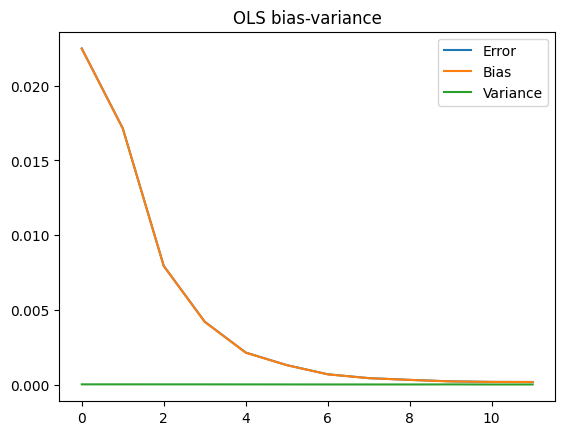

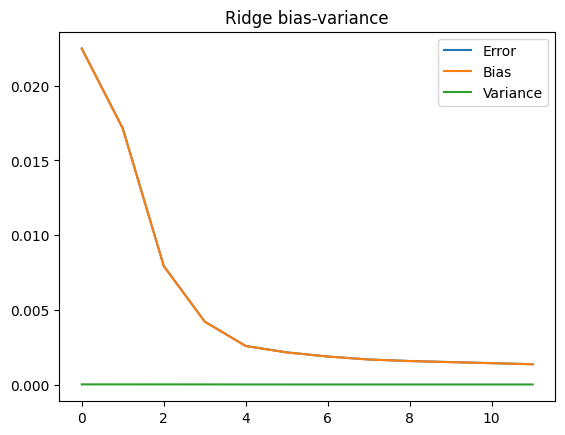

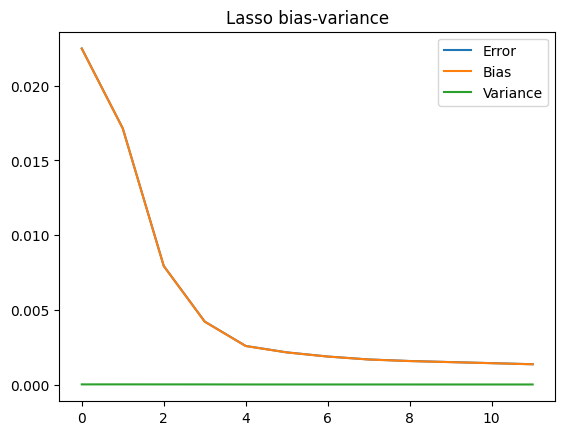

In [11]:
max_polynominal = 12
test_size = 0.2
n_bootstraps = 100

ols_model = LinearModel(LinearModelType.OLS)
ridge_model = LinearModel(LinearModelType.RIDGE)
lasso_model = LinearModel(LinearModelType.LASSO)

ridge_model.set_lambda(0.001)
lasso_model.set_lambda(0.001)

x = x.ravel()
y = y.ravel()
z = z.ravel().reshape(-1,1)
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x, y, z, test_size=test_size)

errors = np.zeros((3, max_polynominal))
biases = np.zeros((3, max_polynominal))
variances = np.zeros((3, max_polynominal))

for current_polynominal in range(1, max_polynominal + 1):
    print(f"at polynomial {current_polynominal} out of {max_polynominal}")
    
    # Creating design matrix 
    X_train = create_design_matrix(x_train, y_train, current_polynominal)

    X_test = create_design_matrix(x_test, y_test, current_polynominal)
    
    predictions = np.zeros((3, len(z_test), n_bootstraps))

    for i in range(n_bootstraps):
        X_, z_ = resample(X_train, z_train)
        # Creating a fit for the models with the data
        ols_model.fit(X_, z_)
        ridge_model.fit(X_, z_)
        lasso_model.fit(X_, z_)

        # Creating predictions with the models
        predictions[0, :, i] = ols_model.predict(X_test).ravel()
        predictions[1, :, i] = ridge_model.predict(X_test).ravel()
        predictions[2, :, i] = lasso_model.predict(X_test).ravel()

    errors[0, current_polynominal - 1] = np.mean(np.mean((z_test - predictions[0, :])**2, axis=1, keepdims=True))
    biases[0, current_polynominal - 1] = np.mean((z_test - np.mean(predictions[0, :], axis=1, keepdims=True))**2)
    variances[0, current_polynominal - 1] = np.mean( np.var(predictions[0, :], axis=1, keepdims=True))

    errors[1, current_polynominal - 1] = np.mean(np.mean((z_test - predictions[1, :])**2, axis=1, keepdims=True))
    biases[1, current_polynominal - 1] = np.mean((z_test - np.mean(predictions[1, :], axis=1, keepdims=True))**2)
    variances[1, current_polynominal - 1] = np.mean( np.var(predictions[1, :], axis=1, keepdims=True))

    errors[2, current_polynominal - 1] = np.mean(np.mean((z_test - predictions[1, :])**2, axis=1, keepdims=True))
    biases[2, current_polynominal - 1] = np.mean((z_test - np.mean(predictions[1, :], axis=1, keepdims=True))**2)
    variances[2, current_polynominal - 1] = np.mean( np.var(predictions[1, :], axis=1, keepdims=True))

plt.figure()
plt.title("OLS bias-variance")
plt.plot(errors[0, :], label="Error")
plt.plot(biases[0, :], label="Bias")
plt.plot(variances[0, :], label="Variance")
plt.legend()
plt.savefig("../figures/ols_bias_variance")


plt.figure()
plt.title("Ridge bias-variance")
plt.plot(errors[1, :], label="Error")
plt.plot(biases[1, :], label="Bias")
plt.plot(variances[1, :], label="Variance")
plt.legend()
plt.savefig("../figures/ridge_bias_variance")

plt.figure()
plt.title("Lasso bias-variance")
plt.plot(errors[1, :], label="Error")
plt.plot(biases[1, :], label="Bias")
plt.plot(variances[1, :], label="Variance")
plt.legend()
plt.savefig("../figures/lasso_bias_variance")


### Neural networks

### Random Forest